# Example: Decaying Turbulence

In [1]:
import lettuce as lt
import matplotlib.pyplot as plt
import numpy as np

## Setup
The dimension of DecayingTurbulence vortex is defined by the stencil. Here the flow is two dimensional due to D2Q9. Special Inputs & standard values that can be set in the flow constructor are ...
* the wavenumber_energy-peak k0 (=20 - default) 
* the initial_energy (= 0.5 - default)

In [2]:
lattice = lt.Lattice(lt.D2Q9, device = "cpu")
flow = lt.DecayingTurbulence(resolution=256, reynolds_number=10000, mach_number=0.05, lattice=lattice)
collision = lt.BGKCollision(lattice, tau=flow.units.relaxation_parameter_lu)
streaming = lt.StandardStreaming(lattice)
simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)
simulation.reporters.append(lt.SpectrumReporter(lattice, flow, interval=500, out=None))

steps     Energy spectrum


### Initialized flow
The initialized velocity is randomly generated and depends on the wavenumber peak k0, the initial energy, which are given in the flow constructor, and a given energy spectrum.

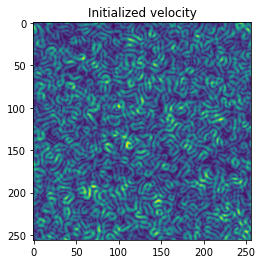

In [3]:
u = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).numpy()
u_norm = np.linalg.norm(u,axis=0)
plt.imshow(u_norm)
plt.title('Initialized velocity')
plt.show()

### Energy spectrum
The energy spectrum, which is forced in the beginning is given with:

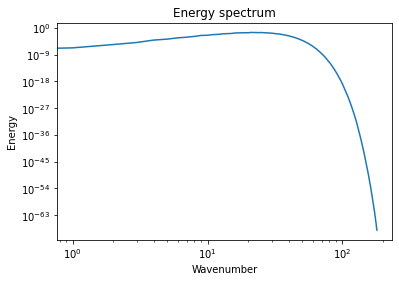

In [4]:
spectrum = flow.energy_spectrum
plt.loglog(spectrum[1],spectrum[0])
plt.title('Energy spectrum')
plt.xlabel('Wavenumber')
plt.ylabel('Energy')
plt.show()

## Run simulation

In [5]:
mlups = simulation.step(num_steps=15000)
print("Performance in MLUPS:", mlups)

Performance in MLUPS: 45.22453853025672


### Velocity
* Velocity field after the simulatin

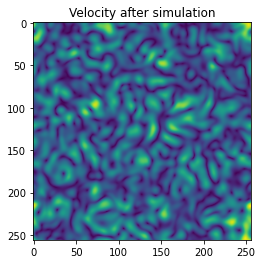

In [6]:
u = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).numpy()
u_norm = np.linalg.norm(u,axis=0)
plt.imshow(u_norm)
plt.title('Velocity after simulation')
plt.show()

### Vorticity
* Vorticity field after the simulatin

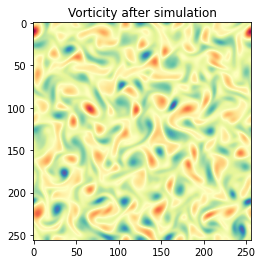

In [7]:
dx = flow.units.convert_length_to_pu(1.0)
grad_u0 = np.gradient(u[0], dx)
grad_u1 = np.gradient(u[1], dx)
vorticity = (grad_u1[0] - grad_u0[1])
plt.imshow(vorticity, cmap='Spectral')
plt.title('Vorticity after simulation')
plt.show()

### Energy spectrum after simulation

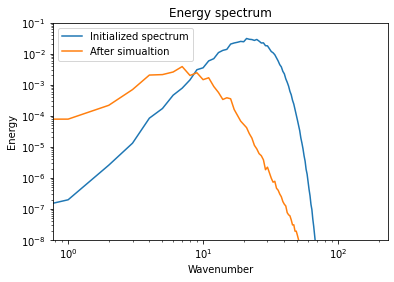

In [8]:
spectrum_final = simulation.reporters[0].out[-1]
plt.loglog(spectrum[1],spectrum[0],label='Initialized spectrum')
plt.loglog(spectrum[1],spectrum_final[1],label='After simualtion')
plt.title('Energy spectrum')
plt.xlabel('Wavenumber')
plt.ylabel('Energy')
plt.ylim(top=1e-1, bottom=1e-8)
plt.legend()
plt.show()